# MTA Fall 2025 Datathon: ACE Violations Data
## Submitted by Dilan Caro and Mariia Onokhina

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.figure_factory as ff
import plotly.express as px

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Import "MTA Bus Automated Camera Enforcement Violations" Dataset
df = pd.read_csv("/content/drive/MyDrive/MTA_Bus_Automated_Camera_Enforcement_Violations__Beginning_October_2019_20250919.csv")

In [ ]:
# Import "MTA Central Business District Bus Speeds" Dataset
df2 = pd.read_csv("/content/drive/MyDrive/MTA_Central_Business_District_Bus_Speeds__Beginning_2023_20250924.csv")

In [63]:
# Import "MTA Bus Route Segment Speeds" Dataset
df3 = pd.read_csv("/content/drive/MyDrive/MTA_Bus_Route_Segment_Speeds__Beginning_2025_20250924.csv")

In [85]:
cuny= pd.read_csv("/content/drive/MyDrive/City_University_of_New_York__CUNY__University_Campus_Locations_20250924.csv")

## Questions to Answer with Data:
1. Which MTA bus routes are highly utilized by CUNY students? For routes that are automated camera-enforced, how have bus speeds changed over time?
2. Some vehicles stopped in violation are exempt from fines due to business reasons. For vehicles that are exempt, are there repeat offenders? Where are exempt vehicles frequently in violation?
3. Some automated camera-enforced routes travel within or cross Manhattan’s Central Business District. How have violations on these routes changed alongside the implementation of congestion pricing?

## Question #1:

In [ ]:
df.head()

,Violation ID,Vehicle ID,First Occurrence,Last Occurrence,Violation Status,Violation Type,Bus Route ID,Violation Latitude,Violation Longitude,Stop ID,Stop Name,Bus Stop Latitude,Bus Stop Longitude,Violation Georeference,Bus Stop Georeference
0,489749182,c5ae1411153b52556a1e648cc80d718aa519a4bdd189ab...,08/20/2025 11:12:08 PM,08/21/2025 12:24:08 AM,TECHNICAL ISSUE/OTHER,MOBILE BUS STOP,BX36,40.840509,-73.881189,102498,EAST TREMONT AV/VYSE AV,40.841076,-73.882483,POINT (-73.881189 40.840509),POINT (-73.882483 40.841076)
1,489744714,df9044acf85cf55488aea4cd3ce1d0e17ef050551726b6...,08/20/2025 11:48:59 PM,08/20/2025 11:54:47 PM,EXEMPT - BUS/PARATRANSIT,MOBILE BUS STOP,BX28,40.874017,-73.890646,100080,PAUL AV/BEDFORD PARK BLVD,40.874629,-73.891539,POINT (-73.890646 40.874017),POINT (-73.891539 40.874629)
2,489743631,eb5a337966ba65f66ab1db8e169d2446a4fb429b0efc63...,08/20/2025 10:33:13 PM,08/20/2025 11:56:02 PM,TECHNICAL ISSUE/OTHER,MOBILE DOUBLE PARKED,Q53+,40.721971,-73.867136,550473,WOODHAVEN BLVD/PENELOPE AV,40.722487,-73.867736,POINT (-73.867136 40.721971),POINT (-73.867736 40.722487)
3,489741945,3f877f70d9b253515a945be807c9c62d5814949f810310...,08/20/2025 10:50:45 PM,08/20/2025 11:32:43 PM,EXEMPT - OTHER,MOBILE BUS STOP,Q44+,40.762529,-73.831728,501140,UNION ST/35 AV,40.765422,-73.827944,POINT (-73.831728 40.762529),POINT (-73.827944 40.765422)
4,489741940,7feac037b62d591ffb1214e356157f3dd197fc22fee5bb...,08/20/2025 10:52:57 AM,08/20/2025 11:16:57 AM,EXEMPT - EMERGENCY VEHICLE,MOBILE BUS STOP,M101,40.815113,-73.955040,401458,AMSTERDAM AV/W 131 ST,40.816009,-73.954424,POINT (-73.95504 40.815113),POINT (-73.954424 40.816009)


In [ ]:
# Unique bus routes in the dataset
df['Bus Route ID'].unique()

array(['BX36', 'BX28', 'Q53+', 'Q44+', 'M101', 'B46+', 'Q69', 'BX38',
       'M42', 'M60+', 'M2', 'BX6+', 'B35', 'BX35', 'M4', 'B82+', 'M34+',
       'M15+', 'BX19', 'BX41+', 'M23+', 'M100', 'BX12+', 'Q43', 'Q54',
       'B41', 'B44+', 'M79+', 'Q58', 'M14+', 'B25', 'B62', 'M86+', 'B26',
       'Q5', 'B42', 'S79+', 'BX5', 'BX28-BX38', 'S46', nan], dtype=object)

In [ ]:
df.count()

,0
Violation ID,3778568
Vehicle ID,3712202
First Occurrence,3778568
Last Occurrence,3778568
Violation Status,3778568
Violation Type,3778568
Bus Route ID,3767819
Violation Latitude,3778568
Violation Longitude,3778568
Stop ID,3778568


In [ ]:
# Check how many rows have NaN values
df.isnull().sum()

,0
Violation ID,0
Vehicle ID,66366
First Occurrence,0
Last Occurrence,0
Violation Status,0
Violation Type,0
Bus Route ID,10749
Violation Latitude,0
Violation Longitude,0
Stop ID,0


In [ ]:
total_violations = len(df)
print("Total violations in dataset:", total_violations)

Total violations in dataset: 3778568


In [ ]:
df["Violation Latitude"]  = pd.to_numeric(df["Violation Latitude"], errors="coerce")
df["Violation Longitude"] = pd.to_numeric(df["Violation Longitude"], errors="coerce")
geo = df[["Violation Latitude", "Violation Longitude"]].dropna().rename(
    columns={"Violation Latitude": "lat", "Violation Longitude": "lon"}
)

In [ ]:
# Create a hexagon-shaped graph of violations per bus route
fig = ff.create_hexbin_mapbox(
    data_frame=geo,
    lat="lat",
    lon="lon",
    nx_hexagon=60,
    opacity=0.7,
    labels={"color": "Violations"},
    min_count=1,     # hide empty hexes
)

In [ ]:
fig.update_layout(
    mapbox_style="carto-positron",
    margin=dict(l=0, r=0, t=40, b=0),
    height=700,
    title="ACE Violation Density Hexbin Map",
)

fig.update_traces(
    hovertemplate="<b>Violations</b>: %{z}<extra></extra>"
)
fig.update_coloraxes(
    colorscale="Viridis",
    colorbar_title="Count"
)

fig.show()

**Insight:** Based on the Hexbin map, the most bus ACE violations happen in Eastern and Upper Manhattan, as well as The Bronx. However, the biggest violation density is in lower Manhattan, next to the Gramercy Park area, with over 99,000 violations!

In [ ]:
# Count violations per Bus Route
route_counts = df.groupby("Bus Route ID")["Violation ID"].count().reset_index()

# Rename columns for clarity
route_counts.columns = ["Bus Route ID", "Violation Count"]

route_counts = route_counts.sort_values(by="Violation Count", ascending=False)

In [ ]:
fig = px.bar(route_counts, x='Bus Route ID', y='Violation Count', title="Number of ACE Violations per Bus Route")
fig.show()

**Insight:** The bar plot further shows that the most violations happen in Manhattan and Bronx bus routes. We want to visualize the actual share of these violations per borough using a pie chart.

In [ ]:
# Function to assign borough by route prefix
def get_borough(route_id: str):
    if isinstance(route_id, str):
        if route_id.startswith("M"):
            return "Manhattan"
        elif route_id.startswith("B") and not route_id.startswith("BX"):
            return "Brooklyn"
        elif route_id.startswith("BX"):
            return "Bronx"
        elif route_id.startswith("Q"):
            return "Queens"
        elif route_id.startswith("S"):
            return "Staten Island"
    return "Other/Unknown"

# Apply classification
df["Borough"] = df["Bus Route ID"].astype(str).apply(get_borough)

# Count violations per borough
borough_counts = df["Borough"].value_counts().reset_index()
borough_counts.columns = ["Borough", "Violation Count"]

print(borough_counts)

         Borough  Violation Count
0          Bronx          1269364
1      Manhattan          1184075
2       Brooklyn           766550
3         Queens           484890
4  Staten Island            62940
5  Other/Unknown            10749


In [34]:
# Pie chart
fig = px.pie(
    borough_counts,
    values="Violation Count",
    names="Borough",
    title="Percentage of ACE Violations by Borough",
    hole=0.3  # makes it a donut, remove if you want a classic pie
)
fig.show()

**Insight:** So, more than half of all ACE violations happen in Manhattan and the Bronx.

In [58]:
# Clean coordinates
df["Violation Latitude"]  = pd.to_numeric(df["Violation Latitude"], errors="coerce")
df["Violation Longitude"] = pd.to_numeric(df["Violation Longitude"], errors="coerce")

# Route-specific filter (B44-SBS)
route_id = "B44+"
brooklyn_route = df[df["Bus Route ID"] == route_id]

# Build hexbin heatmap for violations
geo = brooklyn_route[["Violation Latitude", "Violation Longitude"]].dropna().rename(
    columns={"Violation Latitude": "lat", "Violation Longitude": "lon"}
)

fig = ff.create_hexbin_mapbox(
    data_frame=geo,
    lat="lat",
    lon="lon",
    nx_hexagon=60,
    opacity=0.6,
    labels={"color": "Violations"},
    min_count=1,
)

# Overlay bus 44+ route polyline
b44_coords = [
    [40.58518619005699, -73.93131081708874, "KNAPP ST/SHORE PKWY"],
    [40.58446919136736, -73.93252410544831, "Emmons Av/Brigham St"],
    [40.58416448800929, -73.93834363058096, "EMMONS AV/NOSTRAND AV"],
    [40.586100362193115, -73.93903213983926, "NOSTRAND AV/SHORE PKWY"],
    [40.58994166244116, -73.94002226126628, "Nostrand Av/Av Z"],
    [40.587247633573185, -73.93961122428959, "NOSTRAND AV/VOORHIES AV"],
    [40.59798311848532, -73.94130944222061, "Nostrand Ave & Ave V"],
    [40.60239416647547, -73.94239491538377, "NOSTRAND AV/AVENUE T"],
    [40.629662525898716, -73.94720292284417, "NOSTRAND AV/AVENUE I"],
    [40.63245533865732, -73.94759988978596, "NOSTRAND AV/FLATBUSH AV"],
    [40.63408834239045, -73.94789670729733, "NOSTRAND AV/GLENWOOD RD"],
    [40.63640923807227, -73.9481351496253, "Nostrand Ave & Farragut Rd"],
    [40.63698494498345, -73.94504535941407, "NEW YORK AV/FARRAGUT RD"],
    [40.639352504210606, -73.94524490174209, "NEW YORK AV/FOSTER AV"],
    [40.676209086741146, -73.94695381211623, "NEW YORK AV/ATLANTIC AV"],
    [40.68039177009336, -73.9468470986586, "FULTON ST/NEW YORK AV"],
    [40.681054465678784, -73.95337451284998, "BEDFORD AV/FULTON ST"],
    [40.69886095682635, -73.95692651418798, "BEDFORD AV/FLUSHING AV"],
    [40.705843637333224, -73.96292437660583, "BEDFORD AV/TAYLOR ST"],
    [40.70949727781105, -73.95974212954212, "WILLIAMSBURG"],
]

# Flip [lat, lon] ->[lon, lat]
stops_df = pd.DataFrame(
    [[lon, lat, name] for lat, lon, name in b44_coords],
    columns=["lon", "lat", "Stop Name"]
)

# Add polyline
fig.add_trace(
    px.line_mapbox(
        stops_df,
        lat="lat",
        lon="lon"
    ).data[0]
)
fig.data[-1].update(line=dict(color="blue", width=4), name="B44+ Route")

# Add stops
fig.add_scattermapbox(
    lat=stops_df["lat"],
    lon=stops_df["lon"],
    mode="markers+text",
    marker=dict(size=9, color="red", symbol="circle"),  #
    text=stops_df["Stop Name"],
    textposition="top right",
    name="Stops"
)
# Style the map
fig.update_layout(
    mapbox_style="carto-positron",
    margin=dict(l=0, r=0, t=40, b=0),
    height=800,
    title="Brooklyn Violations Density with B44+ Route",
    legend=dict(
        x=0,
        y=0.5,
        xanchor="left",
        yanchor="middle",
        bgcolor="rgba(255,255,255,0.6)"
    )
)

fig.update_traces(hovertemplate="<b>Violations</b>: %{z}<extra></extra>")

fig.update_coloraxes(
    colorscale="Plasma",
    colorbar_title="Violation Count"
)


## zoom in
# Define bounding box around the two stops
lat_min, lat_max = 40.62966, 40.63641
lon_min, lon_max = -73.94813, -73.94720

# Add padding
lat_pad = 0.002
lon_pad = 0.002

lat_min -= lat_pad
lat_max += lat_pad
lon_min -= lon_pad
lon_max += lon_pad

# Brooklyn College coordinates
brooklyn_college_lat = 40.6310807447647
brooklyn_college_lon = -73.95143654592228

fig.add_scattermapbox(
    lat=[brooklyn_college_lat],
    lon=[brooklyn_college_lon],
    mode="markers+text",
    marker=dict(size=14, color="green", symbol="star"),
    text=["Brooklyn College"],
    textposition="top right",
    name="Brooklyn College"
)

# Update map view
fig.update_layout(
    mapbox=dict(
        center=dict(lat=(lat_min + lat_max) / 2,
                    lon=(lon_min + lon_max) / 2),
        zoom=14,
    )
)
fig.show()


**Insight:** On the B44+ route, most ACE violations happen right next to or close to the CUNY Brooklyn College.

In [87]:

df["Violation Latitude"]  = pd.to_numeric(df["Violation Latitude"], errors="coerce")
df["Violation Longitude"] = pd.to_numeric(df["Violation Longitude"], errors="coerce")
geo = df[["Violation Latitude", "Violation Longitude"]].dropna().rename(
    columns={"Violation Latitude": "lat", "Violation Longitude": "lon"}
)

fig = ff.create_hexbin_mapbox(
    data_frame=geo,
    lat="lat",
    lon="lon",
    nx_hexagon=60,
    opacity=0.7,
    labels={"color": "Violations"},
    min_count=1,
)

# Style the basemap and figure
fig.update_layout(
    mapbox_style="carto-positron",
    margin=dict(l=0, r=0, t=40, b=0),
    height=700,
    title="Bus Stop Violation Density with CUNY Campus Locations",
)

# Tweak color scale & hover
fig.update_traces(
    hovertemplate="<b>Violations</b>: %{z}<extra></extra>"
)
fig.update_coloraxes(
    colorscale="Viridis",
    colorbar_title="Count"
)

# Ensure numeric lat/lon & keep valid rows
cuny["lat"] = pd.to_numeric(cuny["Latitude"], errors="coerce")
cuny["lon"] = pd.to_numeric(cuny["Longitude"], errors="coerce")
cuny = cuny.dropna(subset=["lat", "lon"])

# Build a hover label
cuny["hover"] = (
    "<b>" + cuny["Campus"].astype(str) + "</b><br>"
    + cuny["Address"].astype(str) + ", "
    + cuny["City"].astype(str) + ", " + cuny["State"].astype(str) + " " + cuny["Zip"].astype(str)
    + "<br><i>" + cuny["College or Institution Type"].astype(str) + "</i><br>"
    + cuny["Campus Website"].astype(str)
)

px_under = px.scatter_mapbox(
    cuny,
    lat="lat",
    lon="lon",
    hover_name="hover",
    hover_data={},
    color_discrete_sequence=["white"],
)
px_under.update_traces(
    marker=dict(size=22, opacity=1.0, symbol="circle"),
    showlegend=False,
    hoverinfo="skip",
)

# Create the orange overlay
px_over = px.scatter_mapbox(
    cuny,
    lat="lat",
    lon="lon",
    hover_name="hover",
    hover_data={},
    color_discrete_sequence=["orange"],
)
px_over.update_traces(
    marker=dict(size=18, opacity=1.0, symbol="circle"),
    name="CUNY Campuses",
    showlegend=True,
    hovertemplate="<b>%{hovertext}</b><extra>CUNY</extra>",
)

# Add both layers on top of your hexbin figure
fig.add_traces(px_under.data)
fig.add_traces(px_over.data)

# Show the updated map
fig.show()

**Answering the Business Question:** The bus routes in Manhattan are highly utilized by the CUNY students.

## Question 2:

Now, we want to investigate violations per vehicle and whether there are many repeat offenders.

/tmp/ipython-input-3662526664.py:28: UserWarning:

Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.



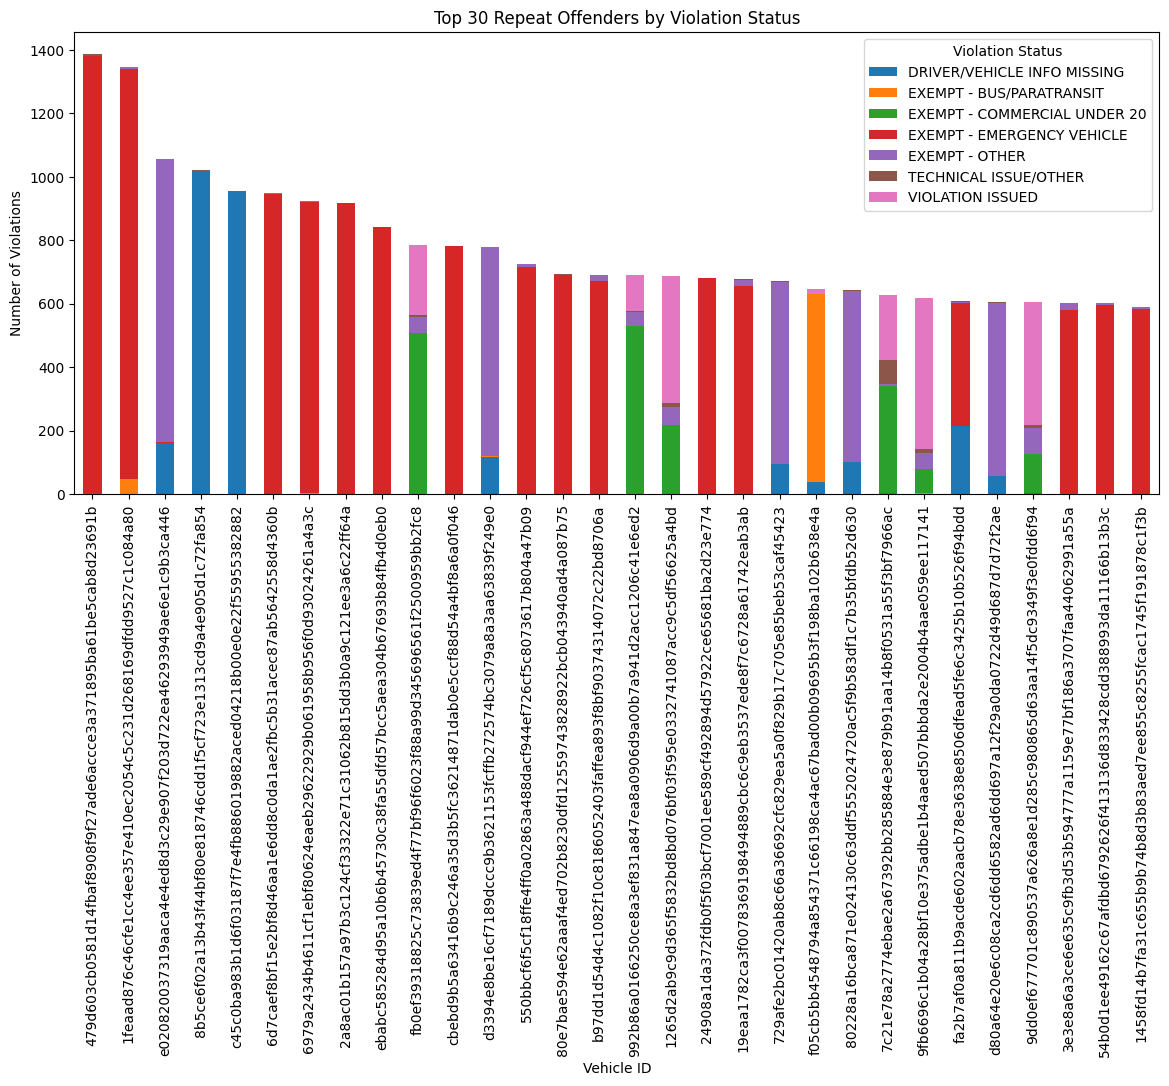

In [35]:
# Count violations per Vehicle ID & Status
counts = (
    df.groupby(["Vehicle ID", "Violation Status"])
    .size()
    .reset_index(name="Violation Count")
)

# Get total violations per Vehicle ID
totals = counts.groupby("Vehicle ID")["Violation Count"].sum().reset_index()
totals = totals.sort_values("Violation Count", ascending=False)

# Take top 30 Vehicle IDs
top30_ids = totals.head(30)["Vehicle ID"]
top30 = counts[counts["Vehicle ID"].isin(top30_ids)]

# Merge totals back for sorting
top30 = top30.merge(totals, on="Vehicle ID", suffixes=("", "_Total"))
top30 = top30.sort_values("Violation Count_Total", ascending=False)

# Plot stacked bars
pivoted = top30.pivot(index="Vehicle ID", columns="Violation Status", values="Violation Count").fillna(0)
pivoted = pivoted.loc[top30_ids]

pivoted.plot(kind="bar", stacked=True, figsize=(14,6))
plt.ylabel("Number of Violations")
plt.title("Top 30 Repeat Offenders by Violation Status")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

**Insight:** There are many repeat offenders but it seems that most of them are exempt from getting fines due to them being special vehicles.

In [36]:
# Filter for exempt violations only
exempt = df[df["Violation Status"].str.contains("EXEMPT", na=False)]

# Extract lat/lon
geo = exempt[["Violation Latitude", "Violation Longitude"]].dropna()
geo = geo.rename(columns={"Violation Latitude": "lat", "Violation Longitude": "lon"})

# Make hexbin map
fig_hex = ff.create_hexbin_mapbox(
    data_frame=geo,
    lat="lat",
    lon="lon",
    nx_hexagon=25,
    opacity=0.6,
    labels={"color": "Violations"},
    min_count=1,
    show_original_data=False,
    mapbox_style="carto-positron",
    color_continuous_scale="YlOrRd"
)

fig_hex.update_layout(
    title="Where Exempt Vehicles Frequently Violate (Top 30 Offenders)",
    margin={"r":0,"t":40,"l":0,"b":0},
    height=600
)
fig_hex.show()

**Insight:** The pattern for exempt vehicle violations follows the general pattern for all violations. The most dense, vehicle-heavy areas like Lower Manhattan, Eastern Manhattan, and The Bronx have the most exempt vehicle violations.

In [37]:
df["Violation Status"].nunique()

7

In [38]:
# Count how many of each violation status, take top 7
status_counts = (
    df["Violation Status"]
    .value_counts()
    .head(7)
    .reset_index()
)
status_counts.columns = ["Violation Status", "Count"]

# Plot top 7 violation statues
fig = px.bar(
    status_counts,
    x="Violation Status",
    y="Count",
    text="Count",
    title="Top 7 Violation Statuses",
)

# Format axes
fig.update_traces(texttemplate='%{text:,}', textposition='outside')
fig.update_yaxes(title="Number of Violations", tickformat=",")
fig.update_xaxes(title="Violation Status")

fig.update_layout(
    height=600,
    width=900,
    xaxis_tickangle=-45,
    uniformtext_minsize=8,
    uniformtext_mode='hide'
)
fig.show()

In [39]:
# Get total violations per Vehicle ID
totals = (
    df.groupby("Vehicle ID")
    .size()
    .reset_index(name="Total Violations")
)

# Get exempt violations per Vehicle ID
exempt_totals = (
    df[df["Violation Status"].str.contains("EXEMPT", na=False)]
    .groupby("Vehicle ID")
    .size()
    .reset_index(name="Exempt Violations")
)

# Merge them together (inner join = only vehicles with exempt violations)
exempt_with_totals = exempt_totals.merge(
    totals, on="Vehicle ID", how="inner"
).sort_values("Exempt Violations", ascending=False)


In [40]:
exempt_with_totals.head()

,Vehicle ID,Exempt Violations,Total Violations
43248,479d603cb0581d14fbaf8908f9f27ade6accce3a371895...,1377,1387
19321,1feaad876c46cfe1cc4ee357e410ec2054c5c231d26816...,1346,1347
66000,6d7caef8bf15e2bf8d46aa1e6dd8c0da1ae2fbc5b31ace...,949,950
63587,6979a2434b4611cf1ebf80624eaeb29622929b061958b9...,924,925
25819,2a8ac01b157a97b3c124cf33322e71c31062b815dd3b0a...,915,916


**Insight:** It's interesting to see that most of the exempt vehicles also have non-exempt violations. We will count total violations for this project.

In [47]:
print(exempt_with_totals[exempt_totals["Exempt Violations"] != 1]["Total Violations"].count())

72330


/tmp/ipython-input-1033647764.py:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



In [43]:
# Count how many violations are repeat exempt offenders
repeat_off_exempt_total = exempt_totals[exempt_totals["Exempt Violations"] != 1]["Exempt Violations"].sum()

In [49]:
total_violations = totals["Total Violations"].sum()

In [52]:
print(f"Percent of repeat exempt violations: {(repeat_off_exempt_total / total_violations) * 100:.2f}%")

Percent of repeat exempt violations: 20.11%


**Insight:** Repeat exempt violations make up about 20.11% of the total violations, which is a pretty significant chunk.

**Answering the Business Question:** According to the data, there are 10,023 repeat offenders that are also exempt vehicles, and they account for a total of 54,453 offences. This is 25.6% of all violations! Most of the exempt vehicles are emergency vehicles. Most of the exempt vehicle violations happen next to the entrance to Interstate 95 to go to New Jersey. Also, there is a higher-than-usual number of violations on the eastern side of Manhattan.

## Question 3:

In [59]:
df2.columns

Index(['Month', 'Day Type', 'Hour of Day', 'TIme Period', 'Route Type',
       'Route ID', 'CBD Relation', 'Sum Mileage', 'Sum Time',
       'Average Road Speed'],
      dtype='object')

In [60]:
df2.head()

,Month,Day Type,Hour of Day,TIme Period,Route Type,Route ID,CBD Relation,Sum Mileage,Sum Time,Average Road Speed
0,12/01/2024,Weekday,0,Overnight,Express,BM1,Non-CBD,45.15,3.65,12.37
1,12/01/2024,Weekday,0,Overnight,Express,BM2,CBD,239.65,16.34,14.67
2,12/01/2024,Weekday,0,Overnight,Express,BM2,Non-CBD,79.61,6.34,12.55
3,12/01/2024,Weekday,0,Overnight,Express,BM3,CBD,51.38,2.47,20.82
4,12/01/2024,Weekday,0,Overnight,Express,BM3,Non-CBD,48.49,3.41,14.23


In [61]:
# Collect unique route IDs from df
routes_in_df = ['BX36', 'BX28', 'Q53+', 'Q44+', 'M101', 'B46+', 'Q69', 'BX38',
       'M42', 'M60+', 'M2', 'BX6+', 'B35', 'BX35', 'M4', 'B82+', 'M34+',
       'M15+', 'BX19', 'BX41+', 'M23+', 'M100', 'BX12+', 'Q43', 'Q54',
       'B41', 'B44+', 'M79+', 'Q58', 'M14+', 'B25', 'B62', 'M86+', 'B26',
       'Q5', 'B42', 'S79+', 'BX5', 'BX28-BX38', 'S46', 'nan']

# Filter df2 so it only contains rows for those routes
df2_filtered = df2[df2["Route ID"].isin(routes_in_df)]

print("Original df2 size:", df2.shape)
print("Filtered df2 size:", df2_filtered.shape)
print("Unique Route IDs after filtering:", df2_filtered["Route ID"].unique())


Original df2 size: (471817, 10)
Filtered df2 size: (64737, 10)
Unique Route IDs after filtering: ['B25' 'B26' 'B35' 'B41' 'B42' 'B62' 'BX19' 'BX28' 'BX35' 'BX36' 'BX5'
 'M100' 'M101' 'M2' 'M4' 'M42' 'Q43' 'Q5' 'Q54' 'Q58' 'Q69' 'S46' 'M15+'
 'M23+' 'M34+' 'M60+' 'M79+' 'M86+' 'Q44+' 'Q53+' 'S79+' 'B82+' 'BX38'
 'B44+' 'B46+' 'BX12+' 'BX41+' 'BX6+']


In [62]:
df2_filtered.head()

,Month,Day Type,Hour of Day,TIme Period,Route Type,Route ID,CBD Relation,Sum Mileage,Sum Time,Average Road Speed
59,12/01/2024,Weekday,0,Overnight,Local,B25,Non-CBD,363.58,41.43,8.78
60,12/01/2024,Weekday,0,Overnight,Local,B26,Non-CBD,512.38,56.06,9.14
63,12/01/2024,Weekday,0,Overnight,Local,B35,Non-CBD,857.56,105.21,8.15
68,12/01/2024,Weekday,0,Overnight,Local,B41,Non-CBD,973.71,109.51,8.89
69,12/01/2024,Weekday,0,Overnight,Local,B42,Non-CBD,153.94,13.74,11.21


In [64]:
# Collect unique route IDs from df3
routes_in_df = ['BX36', 'BX28', 'Q53+', 'Q44+', 'M101', 'B46+', 'Q69', 'BX38',
       'M42', 'M60+', 'M2', 'BX6+', 'B35', 'BX35', 'M4', 'B82+', 'M34+',
       'M15+', 'BX19', 'BX41+', 'M23+', 'M100', 'BX12+', 'Q43', 'Q54',
       'B41', 'B44+', 'M79+', 'Q58', 'M14+', 'B25', 'B62', 'M86+', 'B26',
       'Q5', 'B42', 'S79+', 'BX5', 'BX28-BX38', 'S46', 'nan']

# Filter df3 so it only contains rows for those routes
df3_filtered = df3[df3["Route ID"].isin(routes_in_df)]

print("Original df3 size:", df3.shape)
print("Filtered df3 size:", df3_filtered.shape)
print("Unique Route IDs after filtering:", df3_filtered["Route ID"].unique())

Original df3 size: (3411549, 24)
Filtered df3 size: (453330, 24)
Unique Route IDs after filtering: ['M4' 'BX35' 'M2' 'M15+' 'M42' 'S79+' 'Q58' 'BX36' 'M101' 'BX5' 'B62'
 'BX12+' 'B35' 'Q54' 'Q5' 'M23+' 'B46+' 'B26' 'M34+' 'BX6+' 'M60+' 'M100'
 'Q44+' 'M79+' 'B44+' 'S46' 'Q53+' 'BX41+' 'B41' 'M86+' 'BX28' 'BX38'
 'B25' 'Q43' 'BX19' 'Q69' 'B82+' 'B42']


In [65]:
df3_filtered.head()

,Year,Month,Timestamp,Day of Week,Hour of Day,Route ID,Direction,Borough,Route Type,Stop Order,...,Next Timepoint Stop ID,Next Timepoint Stop Name,Next Timepoint Stop Latitude,Next Timepoint Stop Longitude,Road Distance,Average Travel Time,Average Road Speed,Bus Trip Count,Timepoint Stop Georeference,Next Timepoint Stop Georeference
37,2025,3,03/01/2025 07:00:00 AM,Thursday,7,M4,N,Manhattan,Local,51,...,400613,BROADWAY/W 145 ST,40.826791,-73.94997,0.501,5.616072,5.352497,28,POINT (-73.954489 40.820642),POINT (-73.94997 40.826791)
67,2025,3,03/01/2025 02:00:00 PM,Thursday,14,M4,N,Manhattan,Local,51,...,400613,BROADWAY/W 145 ST,40.826791,-73.94997,0.501,7.063218,4.255850,29,POINT (-73.954489 40.820642),POINT (-73.94997 40.826791)
80,2025,3,03/01/2025 08:00:00 PM,Thursday,20,M4,N,Manhattan,Local,51,...,400613,BROADWAY/W 145 ST,40.826791,-73.94997,0.501,5.294202,5.677910,23,POINT (-73.954489 40.820642),POINT (-73.94997 40.826791)
137,2025,3,03/01/2025 03:00:00 PM,Thursday,15,M4,N,Manhattan,Local,51,...,400613,BROADWAY/W 145 ST,40.826791,-73.94997,0.501,8.045136,3.736418,24,POINT (-73.954489 40.820642),POINT (-73.94997 40.826791)
153,2025,3,03/01/2025 01:00:00 PM,Thursday,13,M4,N,Manhattan,Local,51,...,400613,BROADWAY/W 145 ST,40.826791,-73.94997,0.501,6.236112,4.820310,18,POINT (-73.954489 40.820642),POINT (-73.94997 40.826791)


In [66]:
df3_filtered['Month'].unique()

array([3, 2, 1, 4, 5, 6, 7])

In [67]:
# Clean df2
df2_clean = df2_filtered.copy()

# Extract Year + Month from the Month column (string like "12/01/2024")
df2_clean["Month"] = pd.to_datetime(df2_clean["Month"])
df2_clean["Year"] = df2_clean["Month"].dt.year
df2_clean["Month"] = df2_clean["Month"].dt.month

# Select and align columns
df2_ready = df2_clean[["Year", "Month", "Route ID", "Route Type", "Average Road Speed"]]

monthly = (
    df2_ready.groupby(["Year", "Month"], as_index=False)["Average Road Speed"]
    .mean()
)

# Create a datetime column for plotting
monthly["Date"] = pd.to_datetime(
    monthly["Year"].astype(str) + "-" + monthly["Month"].astype(str) + "-01"
)

In [69]:
# Filter by year (before 2025 and in 2025)
before = monthly[monthly["Year"] < 2025]
after = monthly[monthly["Year"] == 2025]

In [70]:
before.head()

,Year,Month,Average Road Speed,Date
0,2023,1,8.502391,2023-01-01
1,2023,2,8.460812,2023-02-01
2,2023,3,8.369808,2023-03-01
3,2023,4,8.318866,2023-04-01
4,2023,5,8.186488,2023-05-01


In [71]:
after.head()

,Year,Month,Average Road Speed,Date
24,2025,1,8.442988,2025-01-01
25,2025,2,8.314188,2025-02-01
26,2025,3,8.330490,2025-03-01
27,2025,4,8.324688,2025-04-01
28,2025,5,8.187544,2025-05-01


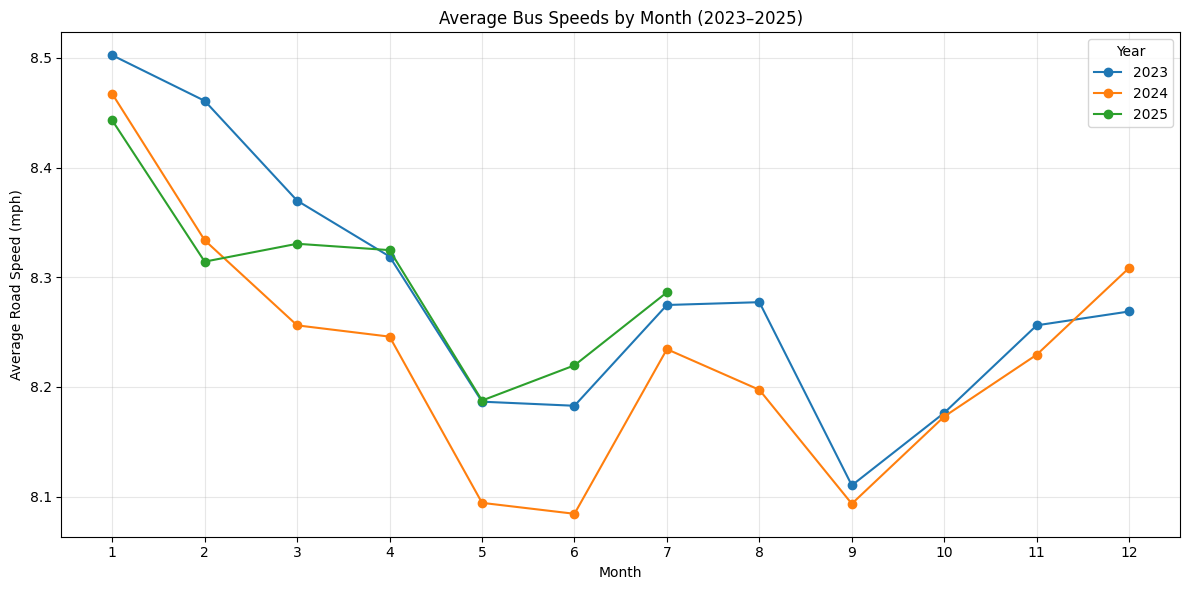

In [72]:
# Group by Year and Month, average speeds
monthly_grouped = (
    df2_ready.groupby(["Year", "Month"], as_index=False)["Average Road Speed"]
    .mean()
)

plt.figure(figsize=(12,6))

# Plot each year separately
for year, data in monthly_grouped.groupby("Year"):
    plt.plot(
        data["Month"],
        data["Average Road Speed"],
        marker="o",
        label=str(year)
    )

plt.title("Average Bus Speeds by Month (2023–2025)")
plt.xlabel("Month")
plt.ylabel("Average Road Speed (mph)")
plt.xticks(range(1,13))  # months 1–12
plt.legend(title="Year")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

Lets try to visualize it with routes that are on the congestion zone:

In [73]:
# Select and align columns
df2_cbd = df2_clean[["Year", "Month", "Route ID", "Route Type", "Average Road Speed","CBD Relation"]]


In [74]:
df2_cbd = df2_cbd[df2_cbd["CBD Relation"] == 'CBD' ]

In [75]:
df2_cbd.head()

,Year,Month,Route ID,Route Type,Average Road Speed,CBD Relation
139,2024,12,M101,Local,9.82,CBD
153,2024,12,M2,Local,10.11,CBD
164,2024,12,M42,Local,6.29,CBD
263,2024,12,M23+,SBS,7.35,CBD
264,2024,12,M34+,SBS,7.13,CBD


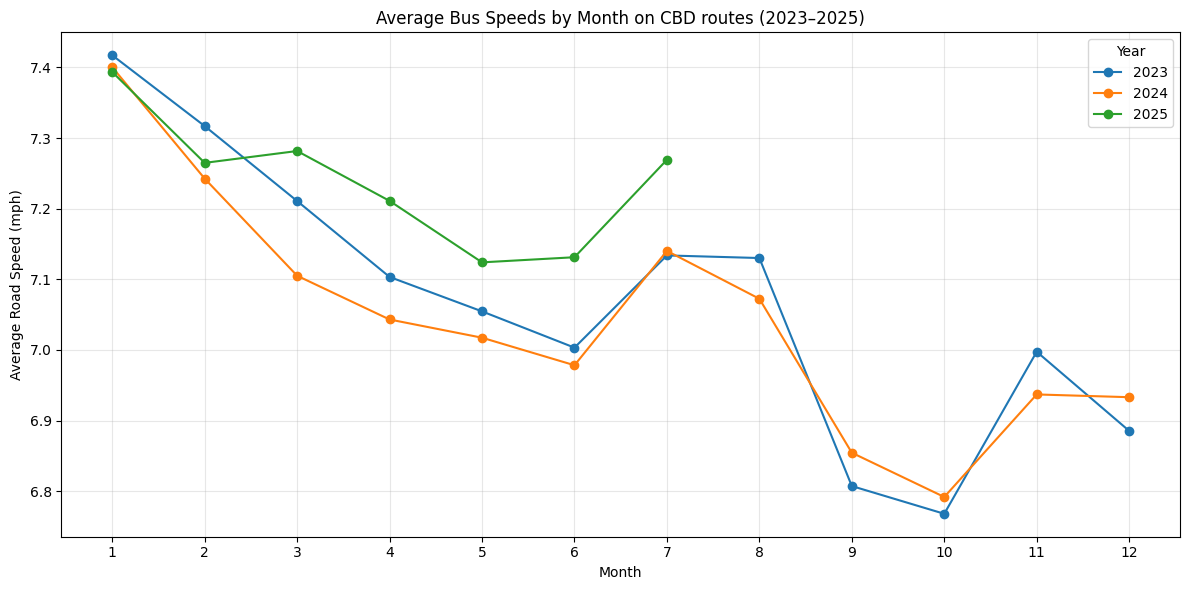

In [76]:
# Group by Year and Month, average speeds
monthly_grouped = (
    df2_cbd.groupby(["Year", "Month"], as_index=False)["Average Road Speed"]
    .mean()
)

plt.figure(figsize=(12,6))

# Plot each year separately
for year, data in monthly_grouped.groupby("Year"):
    plt.plot(
        data["Month"],
        data["Average Road Speed"],
        marker="o",
        label=str(year)
    )

plt.title("Average Bus Speeds by Month on CBD routes (2023–2025)")
plt.xlabel("Month")
plt.ylabel("Average Road Speed (mph)")
plt.xticks(range(1,13))  # months 1–12
plt.legend(title="Year")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [77]:
df2_noncbd = df2_clean[["Year", "Month", "Route ID", "Route Type", "Average Road Speed","CBD Relation"]]
df2_noncbd = df2_noncbd[df2_noncbd["CBD Relation"] == 'Non-CBD' ]

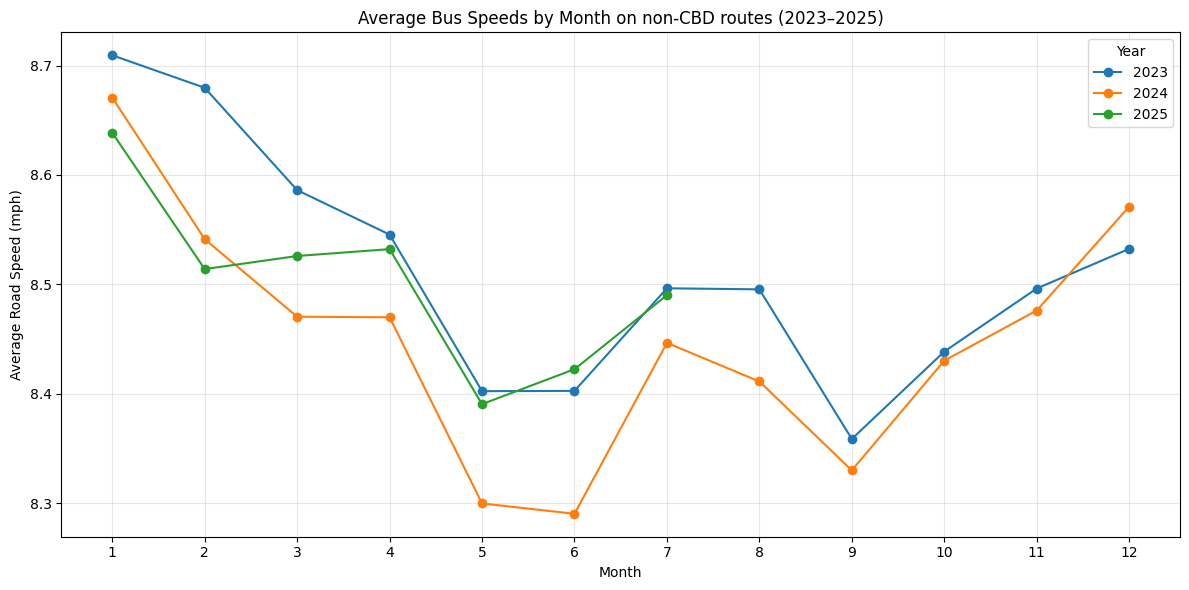

In [78]:
# Group by Year and Month, average speeds
monthly_grouped = (
    df2_noncbd.groupby(["Year", "Month"], as_index=False)["Average Road Speed"]
    .mean()
)

plt.figure(figsize=(12,6))

# Plot each year separately
for year, data in monthly_grouped.groupby("Year"):
    plt.plot(
        data["Month"],
        data["Average Road Speed"],
        marker="o",
        label=str(year)
    )

plt.title("Average Bus Speeds by Month on non-CBD routes (2023–2025)")
plt.xlabel("Month")
plt.ylabel("Average Road Speed (mph)")
plt.xticks(range(1,13))  # months 1–12
plt.legend(title="Year")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

**Insight:** The bus speeds are higher in the Winter and lower in the summer. This could be because of peak tourist season in warmer months.

In [80]:
df2 = df2_filtered.copy()
df2["Month_dt"] = pd.to_datetime(df2["Month"])
df2["Year"] = df2["Month_dt"].dt.year
df2["Month_num"] = df2["Month_dt"].dt.month

# Only keep CBD routes (from df2)
df2_cbd = df2[df2["CBD Relation"] == "CBD"]

# Which routes are CBD?
cbd_routes = df2_cbd["Route ID"].unique()

# Work on violations separately
df["First Occurrence"] = pd.to_datetime(df["First Occurrence"])
df["Year"] = df["First Occurrence"].dt.year
df["Month_num"] = df["First Occurrence"].dt.month

df_viol_cbd = df[df["Bus Route ID"].isin(cbd_routes)]

# Aggregate speeds (from df2_cbd)
speeds_monthly = (
    df2_cbd.groupby(["Year", "Month_num"], as_index=False)["Average Road Speed"]
    .mean()
)

# Aggregate violations (from df_viol_cbd)
violations_monthly = (
    df_viol_cbd.groupby(["Year", "Month_num"], as_index=False)
    .size()
    .rename(columns={"size": "Violation Count"})
)


/tmp/ipython-input-1566400229.py:13: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



In [81]:
merged = pd.merge(
    violations_monthly, speeds_monthly,
    on=["Year","Month_num"], how="left"
)

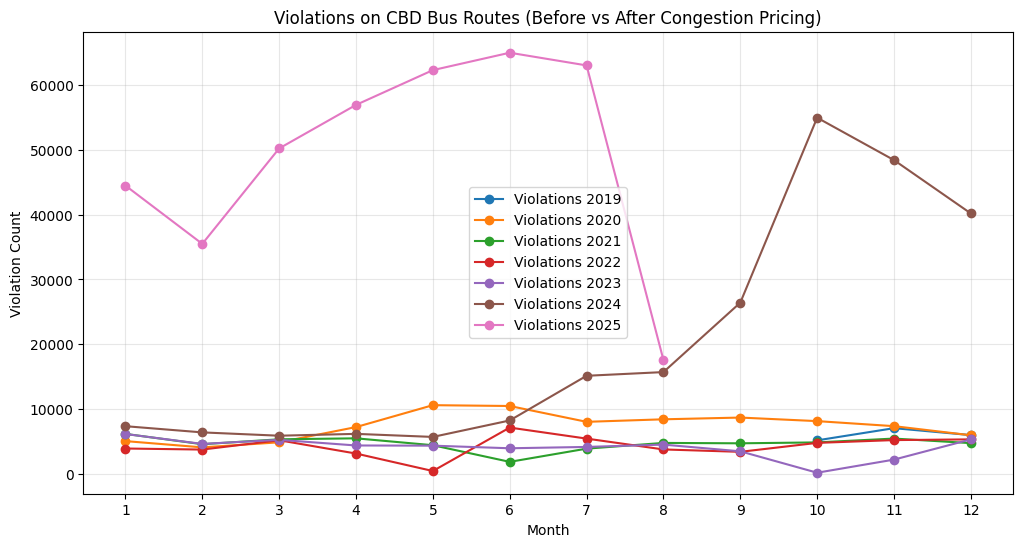

In [82]:
plt.figure(figsize=(12,6))
for year, data in merged.groupby("Year"):
    plt.plot(
        data["Month_num"],
        data["Violation Count"],
        marker="o",
        label=f"Violations {year}"
    )

plt.title("Violations on CBD Bus Routes (Before vs After Congestion Pricing)")
plt.xlabel("Month")
plt.ylabel("Violation Count")
plt.xticks(range(1,13))
plt.legend()
plt.grid(alpha=0.3)
plt.show()

**Insight:** The number of ACE violations increased dramatically after the implementation of congestion pricing in January 2025. One possible reason for that is because drivers most likely try to avoid paying the congestion fee and double park in bus lanes right outside the congestion area.

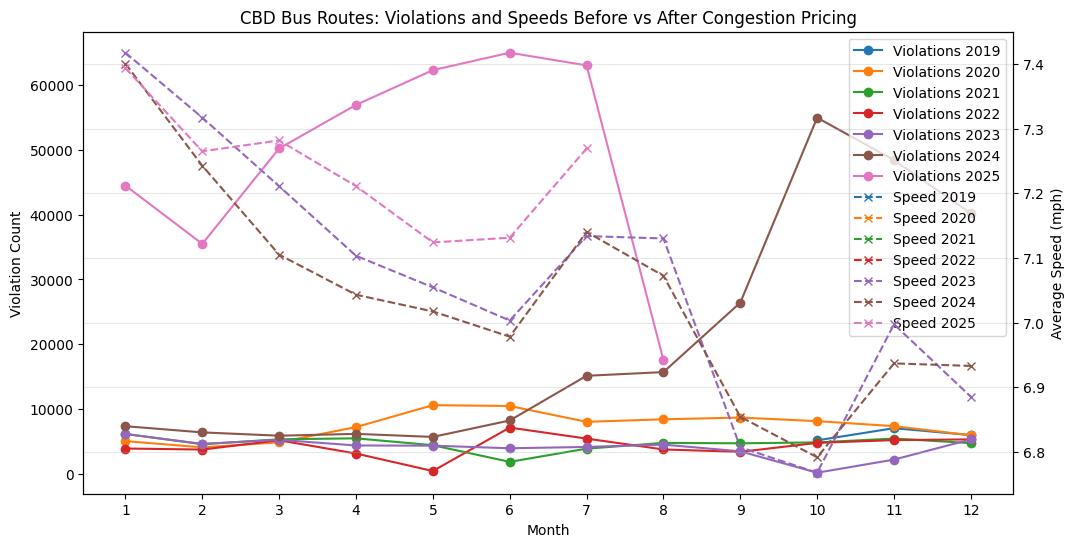

In [83]:
fig, ax1 = plt.subplots(figsize=(12,6))

ax2 = ax1.twinx()

for year, data in merged.groupby("Year"):
    ax1.plot(data["Month_num"], data["Violation Count"], marker="o", label=f"Violations {year}")
    ax2.plot(data["Month_num"], data["Average Road Speed"], marker="x", linestyle="--", label=f"Speed {year}")

ax1.set_xlabel("Month")
ax1.set_ylabel("Violation Count")
ax2.set_ylabel("Average Speed (mph)")
ax1.set_xticks(range(1,13))

# Merge legends
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc="upper right")

plt.title("CBD Bus Routes: Violations and Speeds Before vs After Congestion Pricing")
plt.grid(alpha=0.3)
plt.show()


**Answering with Business Question:** From this graph we can see that the number of ACE violations affects the average bus speed. Whenever there is a spike in ACE violations, the average bus speed tends to be lower. And, on the other hand, whenever there is a decrease in ACE violations, the average bus speed tends to be higher. This makes sense because ACE violations cause the bus lanes to be more congested, therefore reducing the speed of buses.